In [38]:
import os
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [42]:
TRAINING_DIR = "dataset"
training_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True,
                                     validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Make sure you used "categorical"
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               batch_size=16,
                                               shuffle=True,
                                               subset='training')

validation_generator = val_datagen.flow_from_directory(TRAINING_DIR,
                                           target_size=(256, 256),
                                           batch_size=16,
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset='validation')

Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.


In [43]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}

In [44]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [45]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # YOUR CODE HERE, end with 2 Neuron Dense, activated by softmax
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 30, 30, 128)     

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [47]:
history = model.fit(train_generator, 
                    epochs=20, 
                    steps_per_epoch=15, 
                    validation_data=validation_generator, 
                    verbose=1, 
                    validation_steps=2)

Epoch 1/20
15/15 [==============================] - 23s 963ms/step - loss: 1.7847 - accuracy: 0.5570 - val_loss: 0.6351 - val_accuracy: 1.0000
Epoch 2/20
15/15 [==============================] - 10s 626ms/step - loss: 0.6734 - accuracy: 0.6042 - val_loss: 0.7809 - val_accuracy: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 9s 581ms/step - loss: 0.7636 - accuracy: 0.6167 - val_loss: 0.6583 - val_accuracy: 0.8125
Epoch 4/20
15/15 [==============================] - 10s 649ms/step - loss: 0.6954 - accuracy: 0.6250 - val_loss: 0.6629 - val_accuracy: 0.6562
Epoch 5/20
15/15 [==============================] - 9s 598ms/step - loss: 0.6642 - accuracy: 0.5907 - val_loss: 0.7511 - val_accuracy: 0.3750
Epoch 6/20
15/15 [==============================] - 9s 585ms/step - loss: 0.6625 - accuracy: 0.8083 - val_loss: 0.1036 - val_accuracy: 1.0000
Epoch 7/20
15/15 [==============================] - 8s 549ms/step - loss: 0.5037 - accuracy: 0.7833 - val_loss: 0.2385 - val_accuracy: 0.9688

In [50]:
scores = model.evaluate(validation_generator)

31/31 [==============================] - 14s 462ms/step - loss: 0.0968 - accuracy: 0.9737


1/1 [==============================] - 0s 31ms/step
prediksi: Pepper__bell___healthy
persentase prediksi: 94.70 %


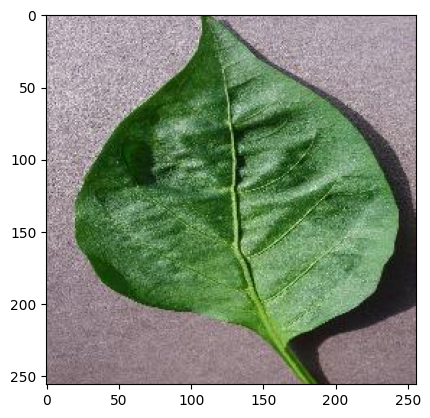

In [56]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = "test1.jpg"
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)/255
img = np.expand_dims(img, axis=0)

images = np.vstack([img])

prediction = model.predict(images, batch_size=10)
predictions = np.argmax(prediction,axis=1)

print('prediksi: {}'.format(class_names[predictions[0]]))
print('persentase prediksi: {:.2f} %'.format(np.max(prediction)*100))

plt.imshow(new_img)

In [57]:
model.save("model/pepper.h5")